# Inference: Hamiltonian MCMC

This example shows you how to perform Bayesian inference on a DISTRIBUTION, using [Hamiltonian Monte Carlo](http://pints.readthedocs.io/en/latest/mcmc_samplers/hamiltonian_mcmc.html).


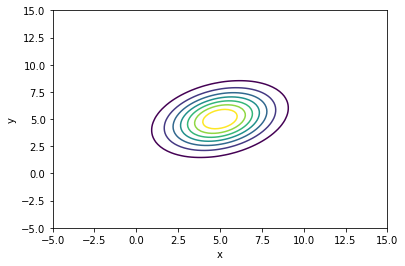

In [9]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.NormalLogPDF([5, 5], [[4, -1], [1, 3]])

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
# Choose starting points for 3 mcmc chains
xs = [
    [0, 0],
    [3, 3],
    [8, 8],
]

# Set a standard deviation, to give the method a sense of scale
sigma = [4, 3]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_pdf, 3, xs, sigma, method=pints.HamiltonianMCMC)

# Add stopping criterion
mcmc.set_max_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(True)

# Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.05)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

Running...
Using Hamiltonian MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. iMCMC iFrog Accept.   iMCMC iFrog Accept.   iMCMC iFrog Accept.   Time m:s
0     3      1     0     0         1     0     0         1     0     0          0:00.0
1     63     2     0     0.333     2     0     0.333     2     0     0.333      0:00.0
2     123    3     0     0.25      3     0     0.25      3     0     0.25       0:00.0
3     183    4     0     0.2       4     0     0.4       4     0     0.4        0:00.0
20    1203   21    0     0.0455    21    0     0.545     21    0     0.273      0:00.1
40    2403   41    0     0.0476    41    0     0.547619  41    0     0.262      0:00.3
60    3603   61    0     0.0323    61    0     0.435     61    0     0.226      0:00.4
80    4803   81    0     0.0366    81    0     0.427     81    0     0.207      0:00.6
100   6003   101   0     0.0392    101   0     0.412     101   0     0.186      0:00.7
120   7203   121   0     0.0328    121   0     

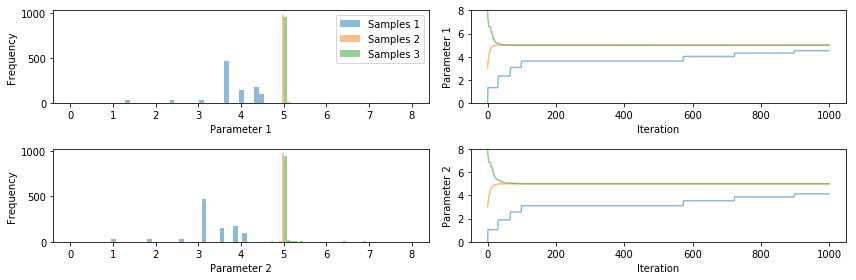

In [22]:
import pints.plot

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 500:, :]

R-hat:
[3.03814352963218, 4.041446315330955]


/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5.00000000000003, right=5.00000000000003
  'left=%s, right=%s') % (left, right))
/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/lib64/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4.999

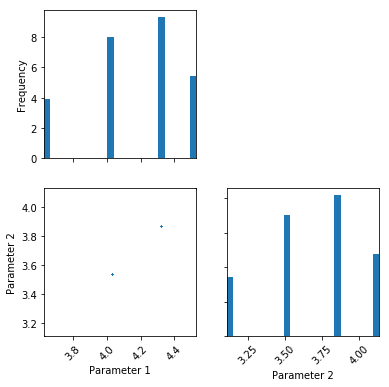

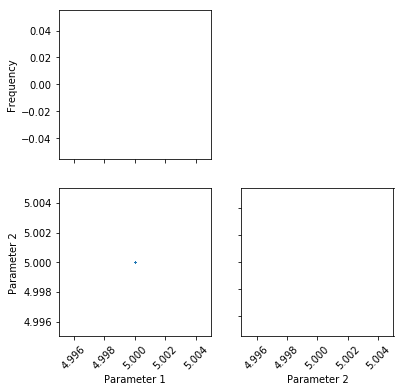

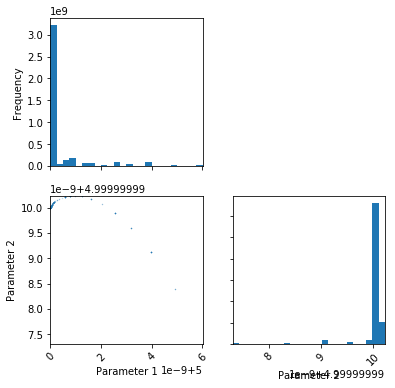

In [23]:
# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chains
pints.plot.pairwise(chains[0], kde=False)
pints.plot.pairwise(chains[1], kde=False)
pints.plot.pairwise(chains[2], kde=False)

# Show graphs
plt.show()